#Importing Libraries and Dataset

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [4]:
dataset = pd.read_csv('Placement_Data_Full_Class.csv')

In [5]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Salary is useless in our classification

In [6]:
dataset.drop(['salary','sl_no'], axis=1, inplace=True)

In [7]:
dataset.isnull().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


#Data Preprocessing

###Using Dummy Variable Trap on HSC subjects and Degree Type for **OHE** in MultiClass

In [9]:
features_to_split = ['hsc_s','degree_t']
for feature in features_to_split:
    dummy = pd.get_dummies(dataset[feature])
    dataset = pd.concat([dataset, dummy], axis=1)
    dataset.drop(feature, axis=1, inplace=True)

In [10]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,False,True,False,False,False,True
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,False,False,True,False,False,True
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Mkt&Fin,57.80,Placed,True,False,False,True,False,False
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Mkt&HR,59.43,Not Placed,False,False,True,False,False,True
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Mkt&Fin,55.50,Placed,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Mkt&Fin,74.49,Placed,False,True,False,True,False,False
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Mkt&Fin,53.62,Placed,False,False,True,False,False,True
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,False,True,False,True,False,False
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Mkt&HR,60.23,Placed,False,True,False,True,False,False


In [11]:
dataset.rename(columns={"Others": "Other_Degree"},inplace=True)

In [12]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,False,True,False,False,False,True
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,False,False,True,False,False,True
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Mkt&Fin,57.80,Placed,True,False,False,True,False,False
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Mkt&HR,59.43,Not Placed,False,False,True,False,False,True
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Mkt&Fin,55.50,Placed,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Mkt&Fin,74.49,Placed,False,True,False,True,False,False
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Mkt&Fin,53.62,Placed,False,False,True,False,False,True
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,False,True,False,True,False,False
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Mkt&HR,60.23,Placed,False,True,False,True,False,False


###**Label Encoding**  for ones with Binary classes

In [49]:
encoder = LabelEncoder()
columns_to_encode = ['gender','ssc_b', 'hsc_b','workex','specialisation','status']
for column in columns_to_encode:
    dataset[column] = encoder.fit_transform(dataset[column])

In [15]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,False,True,False,True,False,False
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,False,False,True,False,False,True
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,False,True,False,True,False,False
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,1,False,True,False,True,False,False


In [16]:
dataset.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,66.370186,0.344186,72.100558,0.441860,62.278186,0.688372
std,0.479168,10.827205,0.499598,10.897509,0.489045,7.358743,0.476211,13.275956,0.497767,5.833385,0.464240
min,0.000000,40.890000,0.000000,37.000000,0.000000,50.000000,0.000000,50.000000,0.000000,51.210000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,61.000000,0.000000,60.000000,0.000000,57.945000,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,66.000000,0.000000,71.000000,0.000000,62.000000,1.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,72.000000,1.000000,83.500000,1.000000,66.255000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,1.000000,98.000000,1.000000,77.890000,1.000000


#Data Analysis and Outlier Removal

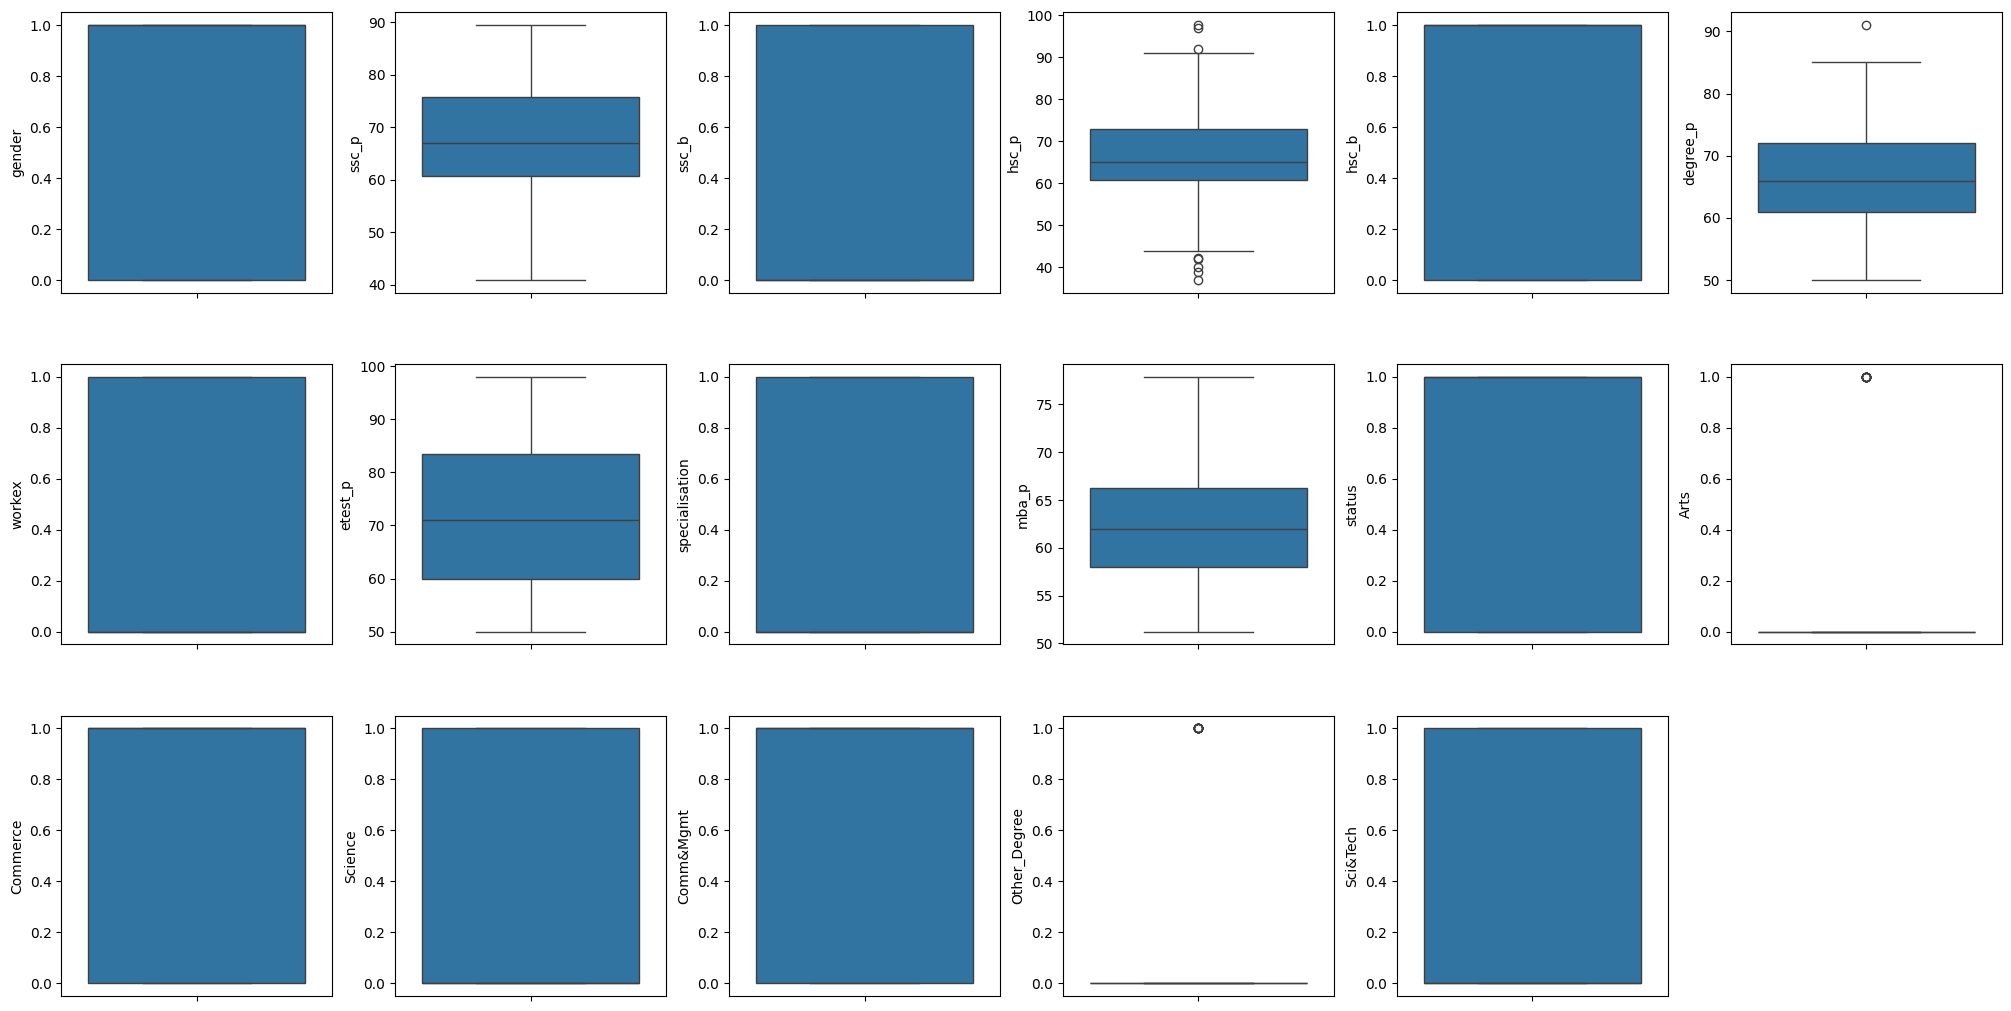

In [17]:
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) # for styling by giving padding

In [18]:
dataset = dataset[~(dataset['degree_p']>=90)]
dataset = dataset[~(dataset['hsc_p']>=95)]

In [19]:
dataset.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
gender,1.000000,-0.059818,0.017052,-0.022187,0.074438,-0.154679,0.093325,0.081765,-0.103355,-0.298466,0.098189,-0.096386,0.001870,0.041426,-0.036801,-0.096386,0.086960
ssc_p,-0.059818,1.000000,0.107995,0.528111,0.056672,0.528753,0.183073,0.264009,-0.177436,0.377438,0.605381,-0.194514,-0.093283,0.181772,-0.168282,-0.063459,0.208907
ssc_b,0.017052,0.107995,1.000000,-0.140332,0.608493,0.020828,-0.027916,-0.018739,-0.057356,0.074653,0.033717,-0.001410,-0.042586,0.043708,-0.078842,-0.001410,0.083707
hsc_p,-0.022187,0.528111,-0.140332,1.000000,-0.038259,0.443595,0.135144,0.208809,-0.222405,0.335610,0.499777,-0.074931,0.267073,-0.236466,0.121441,-0.132137,-0.061747
hsc_b,0.074438,0.056672,0.608493,-0.038259,1.000000,0.043618,0.039061,0.031316,0.004762,0.073936,0.009393,-0.114855,-0.069985,0.122407,-0.019492,-0.114855,0.077977
degree_p,-0.154679,0.528753,0.020828,0.443595,0.043618,1.000000,0.135100,0.226353,-0.232618,0.376261,0.479557,-0.153777,-0.005676,0.074850,-0.004369,-0.180476,0.094883
workex,0.093325,0.183073,-0.027916,0.135144,0.039061,0.135100,1.000000,0.052862,-0.187200,0.174951,0.279091,0.054259,-0.070916,0.047346,-0.118781,0.009501,0.120296
etest_p,0.081765,0.264009,-0.018739,0.208809,0.031316,0.226353,0.052862,1.000000,-0.222765,0.203663,0.122770,-0.073539,-0.023192,0.056508,-0.010486,0.009482,0.006296
specialisation,-0.103355,-0.177436,-0.057356,-0.222405,0.004762,-0.232618,-0.187200,-0.222765,1.000000,-0.100456,-0.251043,-0.080368,-0.126684,0.164258,-0.098640,0.090868,0.058387
mba_p,-0.298466,0.377438,0.074653,0.335610,0.073936,0.376261,0.174951,0.203663,-0.100456,1.000000,0.063197,0.009640,-0.040704,0.036839,-0.087109,-0.031441,0.107435


<Axes: >

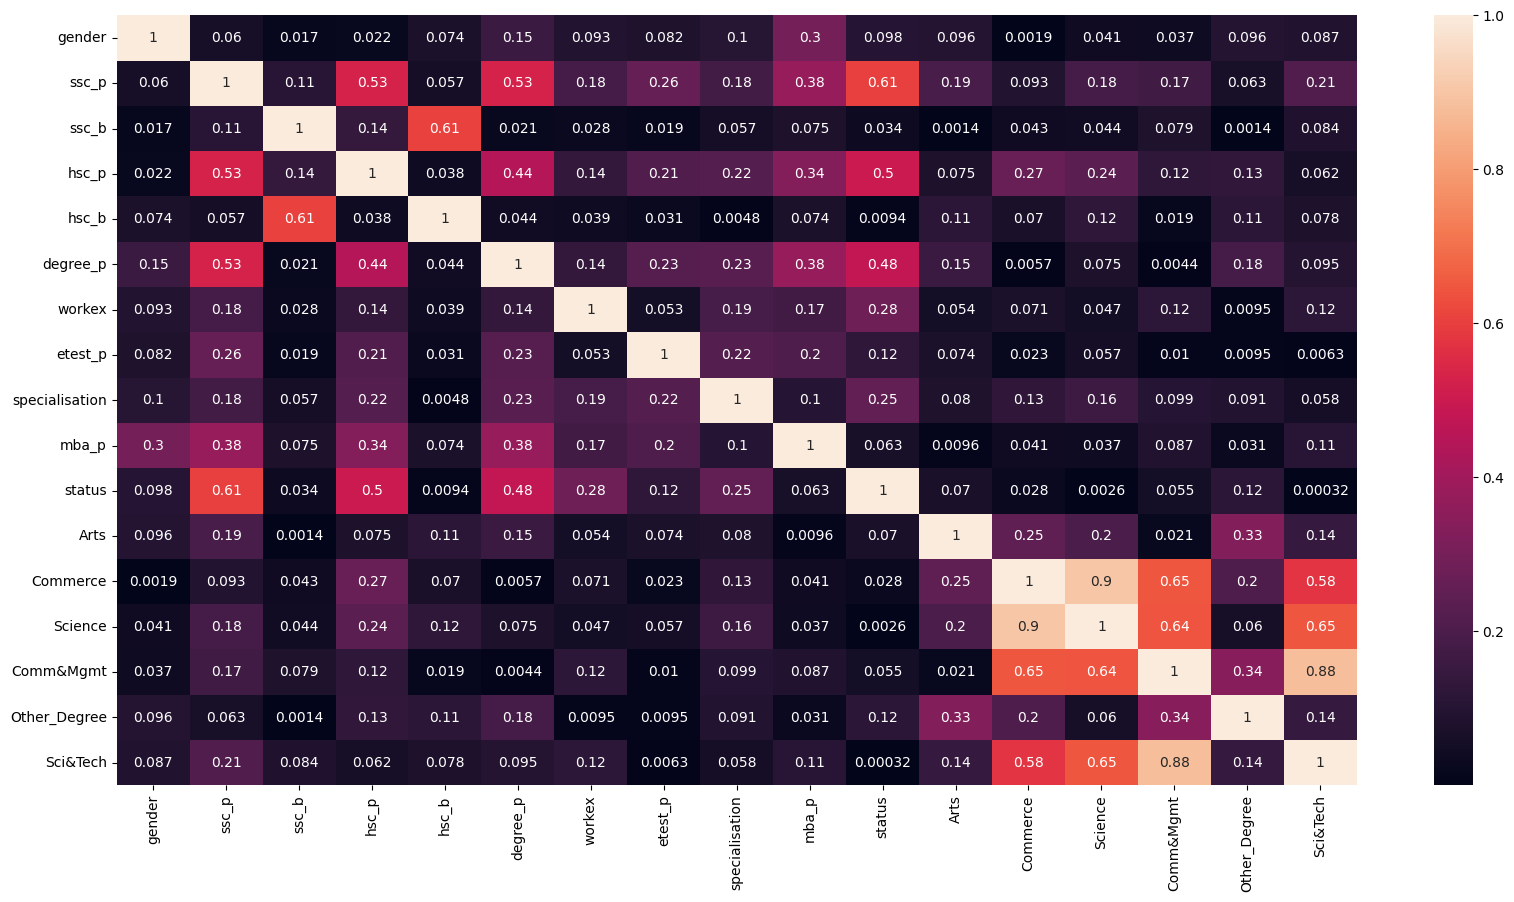

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr().abs(), annot=True)

In [21]:
dataset.shape

(212, 17)

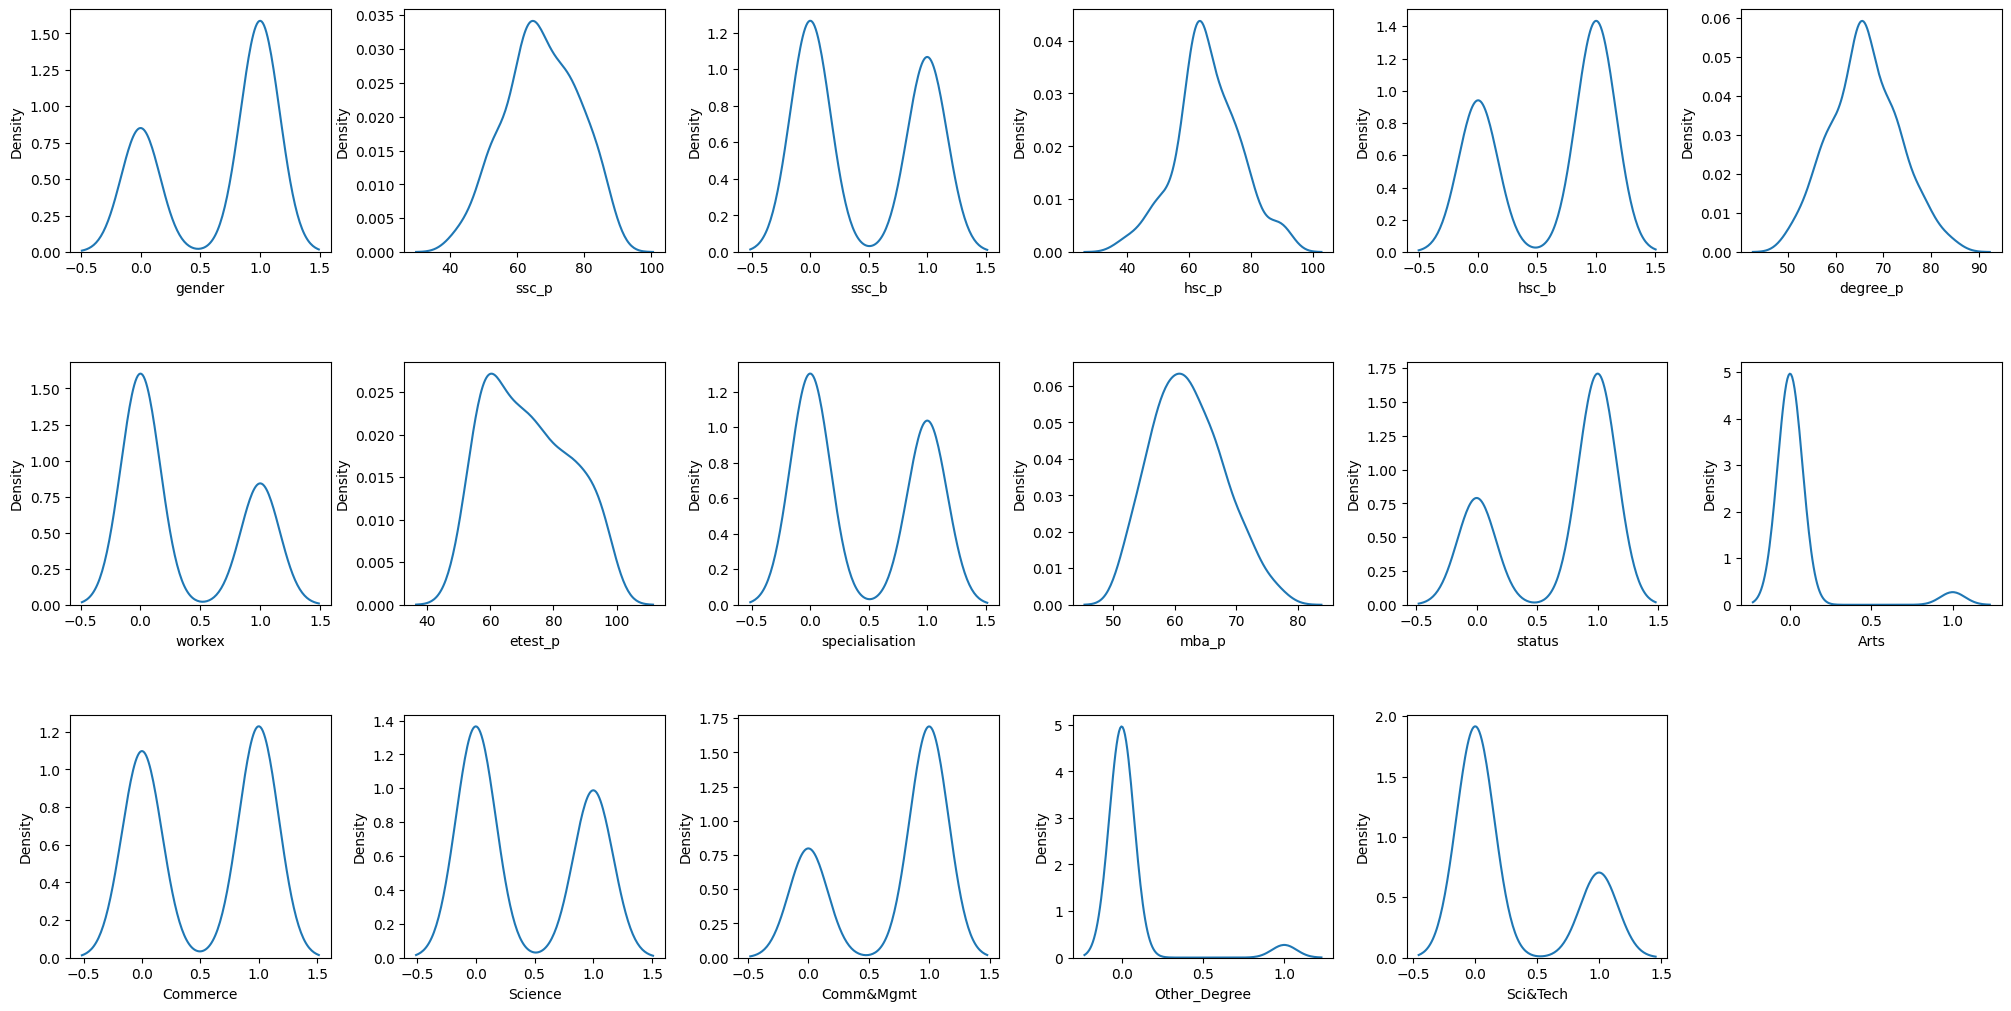

In [22]:
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.kdeplot(v, ax=axs[index])
    #sns.histplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)


#Training Dataset

In [23]:
x = dataset.loc[:,dataset.columns!='status']
y = dataset.loc[:, 'status']

In [24]:
x.sample(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
166,1,62.00,1,62.0,1,60.0,1,63.00,1,52.38,False,True,False,True,False,False
2,1,65.00,0,68.0,0,64.0,0,75.00,0,57.80,True,False,False,True,False,False
105,1,59.00,0,64.0,1,58.0,0,85.00,1,55.30,False,False,True,False,False,True
68,0,69.70,0,47.0,0,72.7,0,79.00,1,59.24,False,True,False,False,False,True
78,1,84.00,1,90.9,1,64.5,0,86.04,0,59.42,False,False,True,False,False,True
127,0,72.00,1,60.0,1,69.0,0,55.50,1,58.40,False,False,True,True,False,False
134,0,77.44,0,92.0,1,72.0,1,94.00,0,67.13,False,True,False,True,False,False
176,0,59.00,0,60.0,1,56.0,0,55.00,1,57.90,False,True,False,True,False,False
168,0,48.00,0,51.0,0,58.0,1,60.00,1,58.79,False,True,False,True,False,False
163,1,63.00,1,67.0,1,64.0,0,75.00,0,66.46,False,False,True,False,False,True


In [25]:
y.sample(10)

,status
207,1
41,0
210,1
68,0
158,0
89,1
206,0
130,0
94,1
78,1


###Train_test_split on Scaled Data

In [26]:
sc= StandardScaler()
x_scaled = sc.fit_transform(x) # for standardising the features
x_scaled = pd.DataFrame(x_scaled)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

##Using Logistic Regression

In [28]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [29]:
y_pred = lr.predict(x_test)

In [30]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [48]:
y_test.head()

,status
31,0
174,1
141,0
76,1
61,1


In [32]:
accuracy_score(y_test, y_pred)

0.8837209302325582

In [33]:
lr.score(x_train,y_train)

0.9171597633136095

In [34]:
confusion_matrix(y_test, y_pred)

array([[10,  3],
       [ 2, 28]])

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43



##Using Naive Bayes Classifier

In [36]:
nbclassifier = GaussianNB()
nbclassifier.fit(x_train, y_train)

GaussianNB()

In [37]:
y_pred_nb = nbclassifier.predict(x_test)
accuracy_score(y_test, y_pred_nb)

0.813953488372093

In [38]:
nbclassifier.score(x_train, y_train)

0.8579881656804734

In [39]:
confusion_matrix(y_test, y_pred_nb)

array([[ 9,  4],
       [ 4, 26]])

In [40]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.87      0.87      0.87        30

    accuracy                           0.81        43
   macro avg       0.78      0.78      0.78        43
weighted avg       0.81      0.81      0.81        43



##Using SVM

In [41]:
clf = svm.SVC(kernel="linear")

In [42]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [50]:
y_pred_svm = clf.predict(x_test)

In [51]:
accuracy_score(y_test, y_pred_svm)

0.8837209302325582

In [45]:
clf.score(x_train, y_train)

0.8994082840236687

In [46]:
confusion_matrix(y_test, y_pred_svm)

array([[10,  3],
       [ 2, 28]])

In [47]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43



As we saw SVM performed better than both linear regression and naive bayes clasifiers


In [54]:
def evaluate_model(name, y_test, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

In [55]:
results = []
results.append(evaluate_model("Logistic Regression", y_test, y_pred))
results.append(evaluate_model("Naive Bayes", y_test, y_pred_nb))
results.append(evaluate_model("SVM", y_test, y_pred_svm))

pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.883721,0.903226,0.933333,0.918033
2,SVM,0.883721,0.903226,0.933333,0.918033
1,Naive Bayes,0.813953,0.866667,0.866667,0.866667
